<a href="https://colab.research.google.com/github/daurice/KNN/blob/main/KNN_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read data
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/KNN/Diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
# data cleaning
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# creates a new DataFrame df3 by filtering out rows from the original DataFrame df
# where any of the specified columns (Glucose, BloodPressure, SkinThickness, Insulin, or BMI) have a value of 0.
columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df3=df.copy()#intitiazing with the orifginal data set
for i in columns:
  df3=df3.loc[df3[i]!=0]






In [ ]:
df3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# replace 0 with non zero mean values
columns_to_be_replaced=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for x in columns_to_be_replaced:
    mean_value= df3[x][df3[x] != 0].mean()  # Calculate mean of non-zero values
    df[x].replace(0, mean_value, inplace=True)

#df['Glucose'].replace(0,df3['Glucose'].mean(),inplace=True)
#df['BloodPressure'].replace(0,df3['BloodPressure'].mean(),inplace=True)
#df['SkinThickness'].replace(0,df3['SkinThickness'].mean(),inplace=True)
#df['Insulin'].replace(0,df3['Insulin'].mean(),inplace=True)
#df['BMI'].replace(0,df3['BMI'].mean(),inplace=True)

In [ ]:
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [ ]:
# define the features and target variable
x=df.iloc[:,0:8]
y=df.iloc[:,8]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [ ]:
# split the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#x_train,y_train,x_test,y_test shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [ ]:
# KNN Classifier
#from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 25)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
# Evaluate
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[82, 17],
       [22, 33]])

Text(33.22222222222222, 0.5, 'Actual')

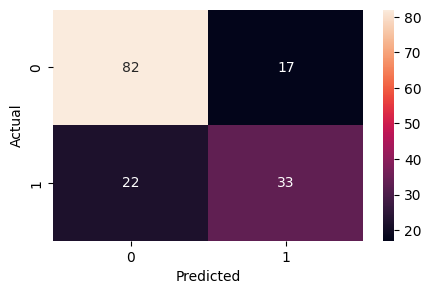

In [ ]:
%matplotlib inline
plt.figure(figsize=(5,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:

parameters = {'n_neighbors': range(1,30),
              'metric':['manhattan','euclidean']}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, parameters, cv=10, scoring ="accuracy")
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 15}
KNeighborsClassifier(metric='manhattan', n_neighbors=15)
0.7592276144907724
